### Чернышова Дана Кирилловна

Task 5. Algorithms on graphs. Introduction to graphs and basic algorithms on
graphs

In [ ]:
import numpy as np
import random
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

In [ ]:
NUM_VERTICES = 100
NUM_EDGES = 200

In [21]:
def gen_random_adj_matrix(num_vertices=100, num_edges=200):
    adj_matrix = np.zeros((num_vertices, num_vertices), dtype=int)
    
    edges_added = 0
    while edges_added < num_edges:
        # Pick two distinct vertices
        v1, v2 = random.sample(range(num_vertices), 2)
        if adj_matrix[v1, v2] == 0:  # check if edge already exists
            adj_matrix[v1, v2] = 1
            adj_matrix[v2, v1] = 1  # undirected graph
            edges_added += 1
    return adj_matrix

def adj_matrix_to_list(adj_matrix) -> list[int]:
    adj_list = {i: [] for i in range(adj_matrix.shape[0])}
    for i in range(adj_matrix.shape[0]):
        for j in range(adj_matrix.shape[1]):
            if adj_matrix[i, j] == 1:
                adj_list[i].append(j)
    return adj_list

Adjacency Matrix (First 5 Rows):
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
  0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0

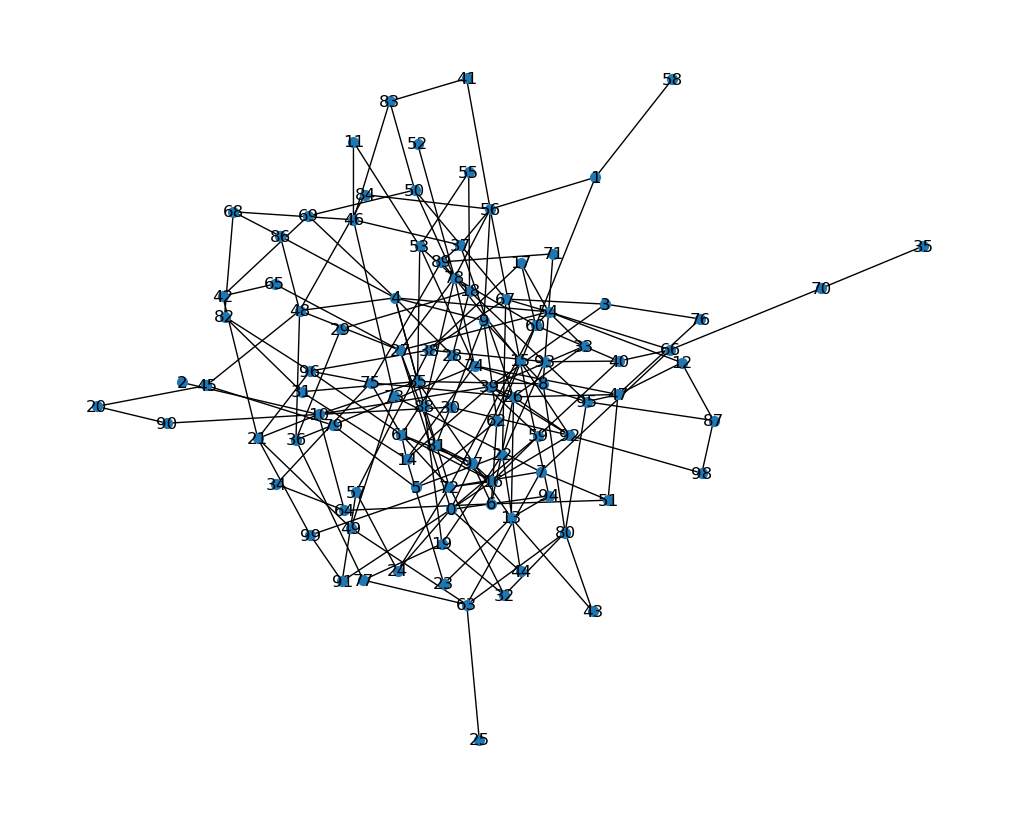

In [23]:
# Generate the adjacency matrix and list
adj_matrix = gen_random_adj_matrix(NUM_VERTICES, NUM_EDGES)
adj_list = adj_matrix_to_list(adj_matrix)

G = nx.from_numpy_array(adj_matrix)
plt.figure(figsize=(10, 8))
nx.draw(G, node_size=50, with_labels=True, edge_color='black', alpha=0.5)

adj_matrix_sample = adj_matrix[:5]
adj_list_sample = {key: adj_list[key] for key in list(adj_list.keys())[:5]}

print(f'Adjacency Matrix (First 5 Rows):\n{adj_matrix_sample}')
print(f'\nAdjacency List (First 5 Vertices):\n{adj_list_sample}')

**Adjacency Matrix:**

(1) Fast to check for the existence of an edge between two vertices (time complexity O(1)).

(2) Inefficient in terms of space for sparse graphs (where the number of edges is much lower than the maximum possible).

(3) The size of the matrix grows quadratically with the number of vertices.

**Adjacency List:**

(1) More space-efficient for sparse graphs since it only stores the edges that exist.

(2) Efficient for algorithms that need to traverse edges (e.g., Depth-First Search, Breadth-First Search).

(3) Checking for the existence of a specific edge takes linear time O(n).

In [24]:
def find_connected_components(adj_list):
    visited = set()
    components = []

    def dfs(v):
        stack = [v]
        component = []
        while stack:
            node = stack.pop()
            if node not in visited:
                visited.add(node)
                component.append(node)
                stack.extend(adj_list[node])
        return component

    for vertex in adj_list:
        if vertex not in visited:
            component = dfs(vertex)
            components.append(component)
    
    return components

def bfs_shortest_path(adj_list, start, goal):
    """
    Explore all neighbors of a vertex before moving to the next layer.
    
    :param adj_list: 
    :param start: 
    :param goal: 
    :return: 
    """
    queue = deque([(start, [start])])
    visited = {start}
    
    while queue:
        current, path = queue.popleft()
        if current == goal:
            return path
        for neighbor in adj_list[current]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append((neighbor, path + [neighbor]))
    return None

In [ ]:
num_vertices = NUM_VERTICES

# find connected components
components = find_connected_components(adj_list)
print(f'Number of connected components: {len(components)}')
print(f'Sample connected component: {components[0]}')

# find the shortest path between two random vertices
start_vertex = random.randint(0, num_vertices - 1)
goal_vertex = random.randint(0, num_vertices - 1)
while goal_vertex == start_vertex:  # ensure distinct vertices
    goal_vertex = random.randint(0, num_vertices - 1)

shortest_path = bfs_shortest_path(adj_list, start_vertex, goal_vertex)
print(f'Shortest path between vertex {start_vertex} and vertex {goal_vertex}: {shortest_path}')
print(f'Length of shortest path: {len(shortest_path) - 1 if shortest_path else 'No path found'}')

data structures:

- Adjacency List: efficiently represents sparse graphs, allowing fast traversal and reducing memory usage.
- Stack for DFS: facilitates depth-first exploration.
- Queue for BFS: enables breadth-first exploration, ensuring shortest path discovery in unweighted graphs.
- Set: efficiently prevents re-exploration of vertices.